In [4]:
import uproot
import hist
from hist import Hist
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
from scipy.optimize import curve_fit
from matplotlib.patches import Rectangle
from functools import reduce

In [5]:
f_mumu = uproot.open("/home/submit/jakedlee/FCCAnalyzer/output_h_bb.root")
print(f_mumu.keys())

['wzp6_ee_eeH_Hbb_ecm240;1', 'wzp6_ee_eeH_Hbb_ecm240/muons_all_p_cut0;1', 'wzp6_ee_eeH_Hbb_ecm240/muons_all_theta_cut0;1', 'wzp6_ee_eeH_Hbb_ecm240/muons_all_phi_cut0;1', 'wzp6_ee_eeH_Hbb_ecm240/muons_all_q_cut0;1', 'wzp6_ee_eeH_Hbb_ecm240/muons_all_no_cut0;1', 'wzp6_ee_eeH_Hbb_ecm240/electrons_all_p_cut0;1', 'wzp6_ee_eeH_Hbb_ecm240/electrons_all_theta_cut0;1', 'wzp6_ee_eeH_Hbb_ecm240/electrons_all_phi_cut0;1', 'wzp6_ee_eeH_Hbb_ecm240/electrons_all_q_cut0;1', 'wzp6_ee_eeH_Hbb_ecm240/electrons_all_no_cut0;1', 'wzp6_ee_eeH_Hbb_ecm240/cutFlow_mumu;1', 'wzp6_ee_eeH_Hbb_ecm240/cutFlow_ee;1', 'wzp6_ee_eeH_Hbb_ecm240/cutFlow_nunu;1', 'wzp6_ee_eeH_Hbb_ecm240/cutFlow_qq;1', 'wzp6_ee_eeH_Hbb_ecm240/missingEnergy;1', 'wzp6_ee_eeH_Hbb_ecm240/cosThetaMiss_nOne;1', 'wzp6_ee_eeH_Hbb_ecm240/cutFlow_bb;1', 'wzp6_ee_eeH_Hbb_ecm240/cutFlow_cc;1', 'wzp6_ee_eeH_Hbb_ecm240/cutFlow_ss;1', 'wzp6_ee_eeH_Hbb_ecm240/mumu_recoil_m_nOne;1', 'wzp6_ee_eeH_Hbb_ecm240/ee_recoil_m_nOne;1', 'wzp6_ee_eeH_Hbb_ecm240/mumu_p

<h1>Cutflow</h1>

KeyInFileError: not found: 'wzp6_ee_eeH_Hcc_ecm240' (with any cycle number)

    Available keys: 'wzp6_ee_eeH_Hbb_ecm240;1', 'wzp6_ee_qqH_Hbb_ecm240;1', 'wzp6_ee_ssH_Hbb_ecm240;1', 'wzp6_ee_ccH_Hbb_ecm240;1', 'wzp6_ee_bbH_Hbb_ecm240;1', 'wzp6_ee_eeH_Hbb_ecm240/meta;1', 'wzp6_ee_eeH_Hbb_ecm240/zcc_m;1'...

in file /home/submit/jakedlee/FCCAnalyzer/output_h_bb.root

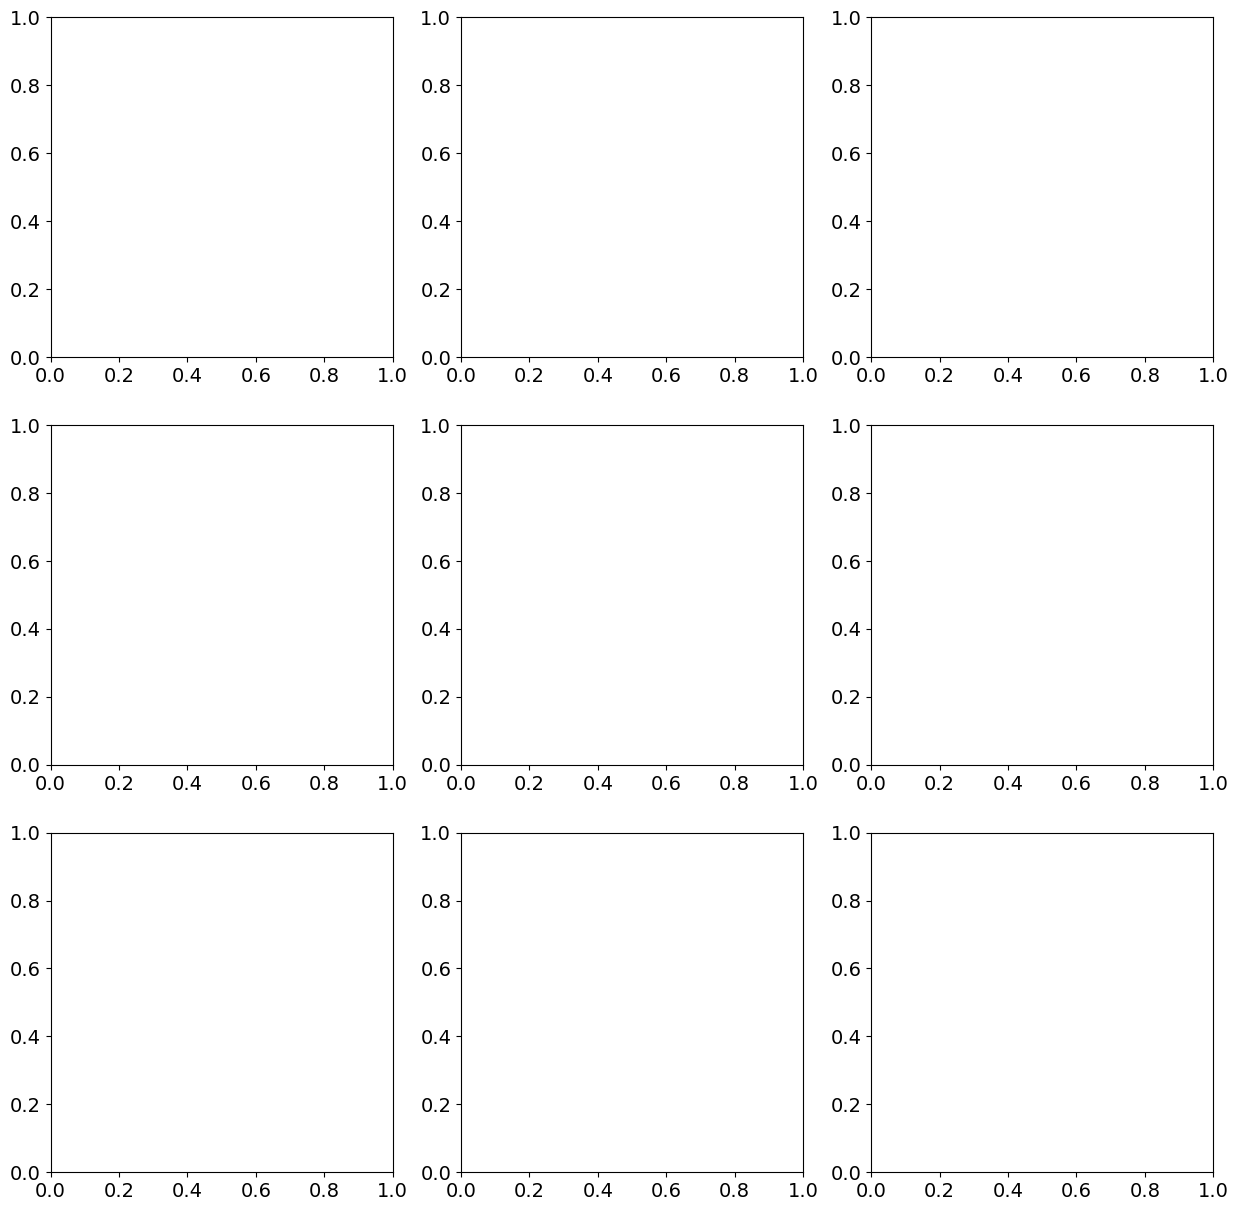

In [6]:
analyses = ['mumu', 'ee', 'nunu', 'qq', 'ss', 'cc', 'bb']

Zprods = ['ee', 'mumu', 'tautau', 'nunu', 'qq', 'ss', 'cc', 'bb']
bb_sig = [f'wzp6_ee_{i}H_Hbb_ecm240' for i in Zprods]
cc_sig = [f'wzp6_ee_{i}H_Hcc_ecm240' for i in Zprods]
gg_sig = [f'wzp6_ee_{i}H_Hgg_ecm240' for i in Zprods]

cols = 3
rows = int(np.ceil(len(analyses) / cols))

# for cut labels
cuts = {}
cuts['mumu'] = ['Decay Products', 'OS Muons', 'H Recoil', 'Z Momentum', 'Z Mass', 'B Tag']
cuts['ee']   = ['Decay Products', 'OS Electrons', 'H Recoil', 'Z Momentum', 'Z Mass', 'B Tag']
cuts['nunu'] = ['Decay Products', 'Dijet Momentum', 'Dijet Mass', 'B Tag']
cuts['qq']   = ['Decay Products', 'Z Momentum', 'H Mass', 'B Tag', 'Q Tag']
cuts['ss']   = ['Decay Products', 'Z Momentum', 'H Mass', 'B Tag', 'S Tag']
cuts['cc']   = ['Decay Products', 'Z Momentum', 'H Mass', 'B Tag', 'C Tag']
cuts['bb']   = ['Decay Products', 'Z Momentum', 'H Mass', 'Hbb Tag', 'Zbb Tag']

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

for i in range(rows):
    for j in range(cols):
        if i*cols + j < len(analyses):
            p = analyses[i*cols + j]
        else:
            break
        part = f_mumu[f'wzp6_ee_{p}H_Hbb_ecm240/cutFlow_{p}'].to_hist()
        maxi = np.nonzero(part.values())[0][-1]
        WW   = f_mumu[f'p8_ee_WW_ecm240/cutFlow_{p}'].to_hist()
        ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/cutFlow_{p}'].to_hist()
        Hbb = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_Hbb_ecm240', bb_sig)])
        Hcc = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in cc_sig])
        Hgg = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in gg_sig])
        
        ax[i][j].stairs(part.values(), label=f'Z{p}')
        ax[i][j].stairs(WW.values(), label=f'WW bkg')
        ax[i][j].stairs(ZZ.values(), label=f'ZZ bkg')
        ax[i][j].stairs(Hbb.values(), label='Other Hbb')
        ax[i][j].stairs(Hcc.values(), label='Hcc')
        ax[i][j].stairs(Hgg.values(), label='Hgg')
        
        ax[i][j].legend()
        ax[i][j].set_yscale('log')
        ax[i][j].set_title(f'Cuts for Z{p}')
        ax[i][j].set_ylabel('Events')
        ax[i][j].set_xlabel('')
        ax[i][j].set_xticks(ticks=list(range(1, len(cuts[p]) + 1)),
                   labels=cuts[p],
                   rotation=-45, ha='left')
        ax[i][j].set_xlim((0, maxi + 1))
        ax[i][j].set_ylim(10, 2e8)

plt.tight_layout()
plt.show()

Graph cuts specifically for Z->leps:

In [ ]:
prods = ['mumu', 'ee', 'nunu', 'qq']

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 3, figsize=(16,7))

for i in range(3):
        p = prods[i]
        
        part = f_mumu[f'wzp6_ee_{p}H_Hbb_ecm240/cutFlow_{p}'].to_hist()
        maxi = np.nonzero(part.values())[0][-1]
        WW   = f_mumu[f'p8_ee_WW_ecm240/cutFlow_{p}'].to_hist()
        ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/cutFlow_{p}'].to_hist()
        Hbb = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_Hbb_ecm240', bb_sig)])
        Hcc = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in cc_sig])
        Hgg = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in gg_sig])
        
        ax[i].stairs(part.values(), label=f'Z{p}')
        ax[i].stairs(WW.values(), label='WW bkg')
        ax[i].stairs(ZZ.values(), label='ZZ bkg')
        ax[i].stairs(Hbb.values(), label='Other Hbb')
        ax[i].stairs(Hcc.values(), label='Hcc')
        ax[i].stairs(Hgg.values(), label='Hgg')
        
        ax[i].legend(loc='upper right')
        ax[i].set_yscale('log')
        ax[i].set_ylim(10, 2e8)
        ax[i].set_title(f'ZH->{p}bb')
        ax[i].set_ylabel('Events')
        ax[i].set_xlabel('')
        ax[i].set_xticks(ticks=list(range(1, len(cuts[p]) + 1)),
                   labels=cuts[p],
                   rotation=-45, ha='left')
        ax[i].set_xlim((0, maxi + 1))

plt.suptitle('Cuts on Z->Leptons')
plt.tight_layout()
plt.show()

Graph cuts specifically for Z->quarks:

In [ ]:
prods = ['qq', 'ss', 'cc', 'bb']

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(2, 2, figsize=(12,12))

for i in range(2):
    for j in range(2):
        p = prods[i*2 + j]
        
        part = f_mumu[f'wzp6_ee_{p}H_Hbb_ecm240/cutFlow_{p}'].to_hist()
        maxi = np.nonzero(part.values())[0][-1]
        WW   = f_mumu[f'p8_ee_WW_ecm240/cutFlow_{p}'].to_hist()
        ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/cutFlow_{p}'].to_hist()
        Hbb = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_Hbb_ecm240', bb_sig)])
        Hcc = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in cc_sig])
        Hgg = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in gg_sig])
        
        ax[i][j].stairs(part.values(), label=f'Z{p}')
        ax[i][j].stairs(WW.values(), label='WW bkg')
        ax[i][j].stairs(ZZ.values(), label='ZZ bkg')
        ax[i][j].stairs(Hbb.values(), label='Other Hbb')
        ax[i][j].stairs(Hcc.values(), label='Hcc')
        ax[i][j].stairs(Hgg.values(), label='Hgg')
        
        ax[i][j].legend(loc='upper right')
        ax[i][j].set_yscale('log')
        ax[i][j].set_ylim(10, 2e8)
        ax[i][j].set_title(f'ZH->{p}bb')
        ax[i][j].set_ylabel('Events')
        ax[i][j].set_xlabel('')
        ax[i][j].set_xticks(ticks=list(range(1, len(cuts[p]) + 1)),
                   labels=cuts[p],
                   rotation=-45, ha='left')
        ax[i][j].set_xlim((0, maxi + 1))

plt.suptitle('Cuts on Z->Quarks')
plt.tight_layout()
plt.show()

In [ ]:
p = 'nunu'

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(6, 6))
plt.tight_layout()

part = f_mumu[f'wzp6_ee_{p}H_Hbb_ecm240/cutFlow_{p}'].to_hist()
maxi = np.nonzero(part.values())[0][-1]
WW   = f_mumu[f'p8_ee_WW_ecm240/cutFlow_{p}'].to_hist()
ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/cutFlow_{p}'].to_hist()
Hbb = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_Hbb_ecm240', bb_sig)])
Hcc = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in cc_sig])
Hgg = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in gg_sig])

plt.stairs(part.values(), label=f'Z{p}')
plt.stairs(WW.values(), label='WW bkg')
plt.stairs(ZZ.values(), label='ZZ bkg')
plt.stairs(Hbb.values(), label='Other Hbb')
plt.stairs(Hcc.values(), label='Hcc')
plt.stairs(Hgg.values(), label='Hgg')

plt.legend(loc='upper right')
plt.yscale('log')
plt.ylim(10, 2e8)
plt.title(f'Cuts on ZH->{p}bb')
plt.ylabel('Events')
plt.xlabel('')
plt.xticks(ticks=list(range(1, len(cuts[p]) + 1)),
           labels=cuts[p],
           rotation=-45, ha='left')
plt.xlim(0, maxi + 1)

plt.show()

<h1>Misc Graphs</h1>

/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/work/submit/submit-software/conda/envs/fcc-ee/lib/pytho

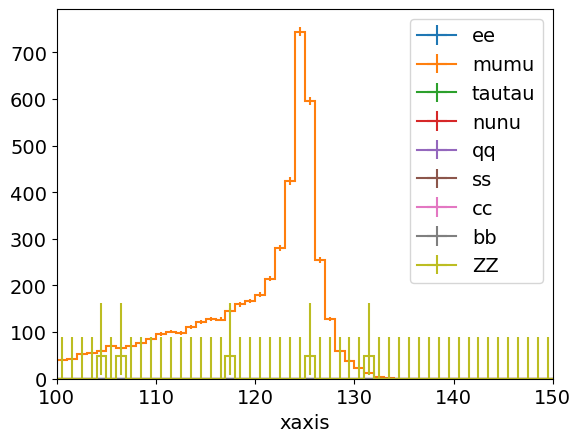

In [25]:
z_products = ['ee', 'mumu', 'tautau', 'nunu', 'qq', 'ss', 'cc', 'bb']
g = 'hmuons_m'

ZZ = f_mumu[f'p8_ee_ZZ_ecm240/{g}'].to_hist()
hists = [f_mumu[f'wzp6_ee_{i}H_Hbb_ecm240/{g}'].to_hist() for i in z_products]
hists.append(ZZ)
z_products.append('ZZ')
hep.histplot(hists, label=z_products)#, stack=True)
#plt.xlim(115,140)
plt.legend()
plt.xlim(100, 150)
plt.show()

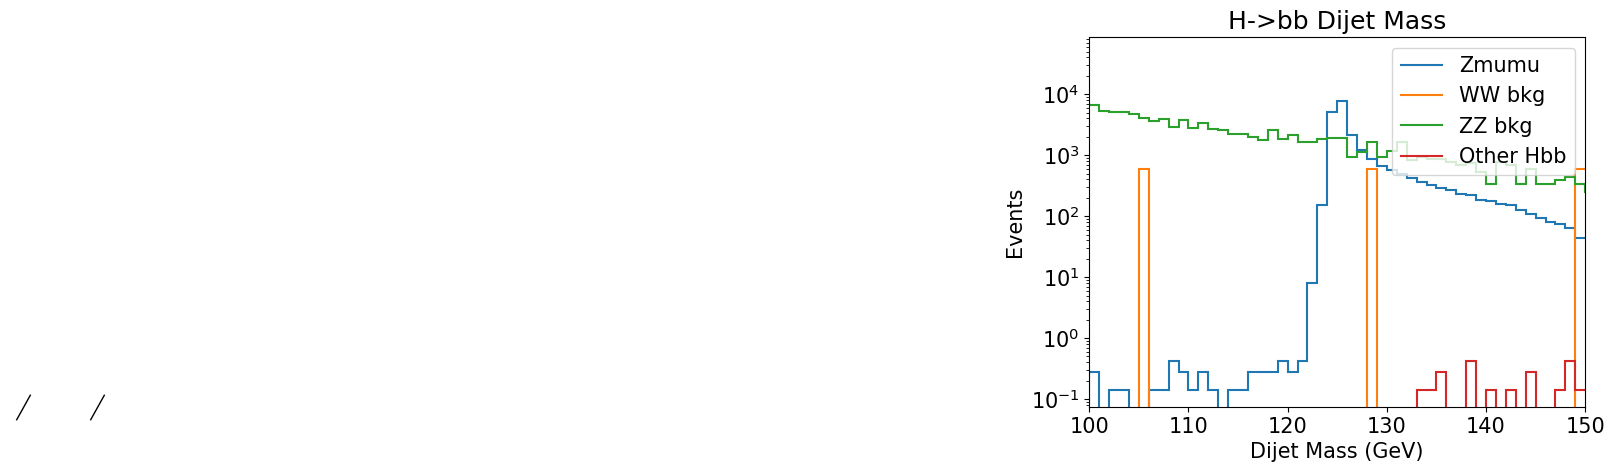

In [6]:
p = 'mumu'
g = f'mumu_recoil_m_nOne'

mumu =  f_mumu[f'wzp6_ee_{p}H_Hbb_ecm240/{g}'].to_hist()
WW   = f_mumu[f'p8_ee_WW_ecm240/{g}'].to_hist()
ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/{g}'].to_hist()
rest = reduce(lambda a, b : a + b, [f_mumu[x + f'/{g}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_Hbb_ecm240', bb_sig)])
plt.rcParams.update({'font.size': 15})
hep.histplot([mumu, WW, ZZ, rest], label=[f'Z{p}', 'WW bkg', 'ZZ bkg', 'Other Hbb'], yerr=False)
#hep.histplot(mumu, ZZ, yerr=False)
plt.legend(loc='upper right')
plt.title("H->bb Dijet Mass")
plt.ylabel("Events")
plt.xlabel("Dijet Mass (GeV)")
plt.yscale('log')
plt.xlim(100, 150)
plt.show()

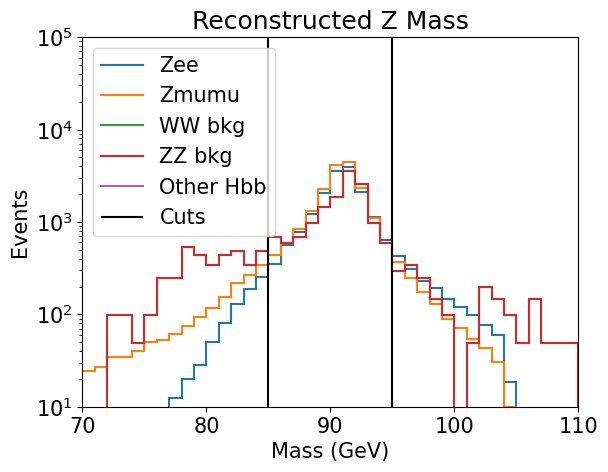

In [49]:
g = f'zee_m_nOne'

mumu = f_mumu[f'wzp6_ee_mumuH_Hbb_ecm240/zmumu_m_nOne'].to_hist()
ee   = f_mumu[f'wzp6_ee_eeH_Hbb_ecm240/zee_m_nOne'].to_hist()
WW   = f_mumu[f'p8_ee_WW_ecm240/{g}'].to_hist()
ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/{g}'].to_hist()
rest = reduce(lambda a, b : a + b, [f_mumu[x + f'/{g}'].to_hist() for x in filter(lambda x : x != 'wzp6_ee_eeH_Hbb_ecm240' and x != 'wzp6_ee_mumuH_Hbb_ecm240', bb_sig)])
plt.rcParams.update({'font.size': 15})
hep.histplot([ee, mumu, WW, ZZ, rest], label=['Zee', 'Zmumu', 'WW bkg', 'ZZ bkg', 'Other Hbb'], yerr=False)
plt.vlines([85, 95], [10, 10], [1e5, 1e5], color='black', label='Cuts')
plt.legend(loc='upper left')
plt.title("Reconstructed Z Mass")
plt.ylabel("Events")
plt.xlabel("Mass (GeV)")
plt.yscale('log')
plt.xlim(70, 110)
plt.ylim(10, 1e5)
plt.show()

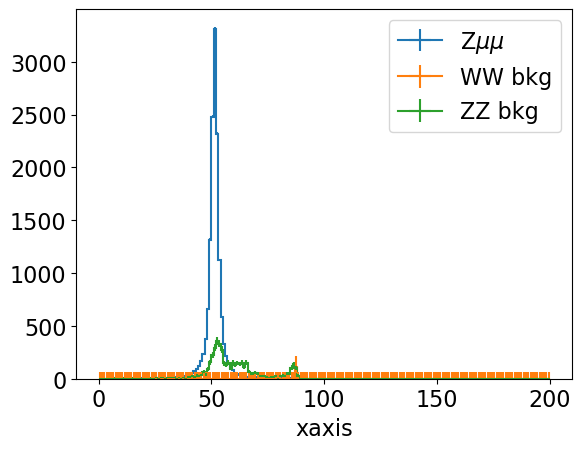

In [86]:
mumu =  f_mumu['wzp6_ee_mumuH_Hbb_ecm240/mumu_p_nOne'].to_hist()
WW   = f_mumu['p8_ee_WW_ecm240/mumu_p_nOne'].to_hist()
ZZ   = f_mumu['p8_ee_ZZ_ecm240/mumu_p_nOne'].to_hist()
hep.histplot([mumu, WW, ZZ], label=['Z$\mu\mu$', 'WW bkg', 'ZZ bkg'])#, stack=True)
plt.legend()
plt.show()

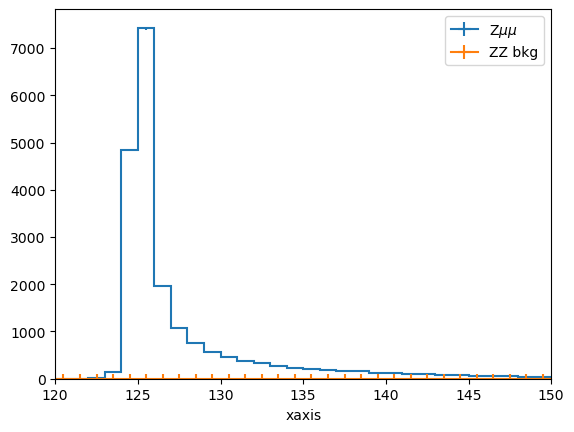

In [32]:
#zmumu_m_nOne
mumu =  f_mumu['wzp6_ee_mumuH_Hbb_ecm240/mumu_recoil_m_nOne'].to_hist()
#ee   =  f_mumu['wzp6_ee_eeH_Hbb_ecm240/muons_all_p_cut0'].to_hist()
#WW   = f_mumu['p8_ee_WW_ecm240/muons_all_p_cut0'].to_hist()
ZZ   = f_mumu['p8_ee_ZZ_ecm240/zmumu_m_nOne'].to_hist()
hep.histplot([mumu, ZZ], label=['Z$\mu\mu$', 'ZZ bkg'])
#hep.histplot(mumu, label='Z$\mu\mu$')
plt.legend()
plt.xlim((120,150))
#plt.ylim((0,50000))
#plt.yscale('log')
plt.show()

<h1>Flavour Tagging Scan</h1>

In [7]:
def minmax(data):
    min_val = np.nanmin(data)
    max_val = np.nanmax(data)
    return (data - min_val) / (max_val - min_val)

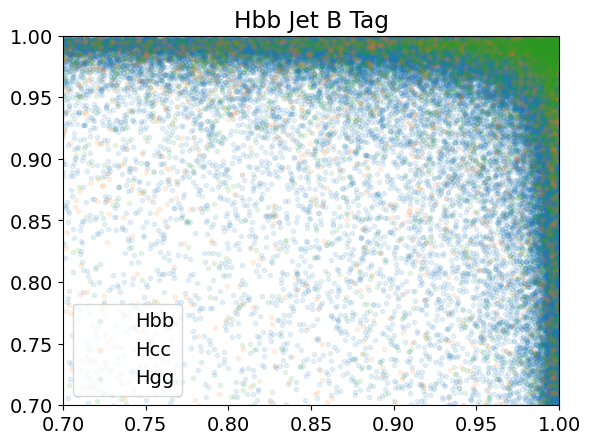

In [48]:
bb = [f'wzp6_ee_{i}H_Hbb_ecm240' for i in ['bb', 'cc', 'ss', 'qq']]
cc = [f'wzp6_ee_{i}H_Hcc_ecm240' for i in ['bb', 'cc', 'ss', 'qq']]
gg = [f'wzp6_ee_{i}H_Hgg_ecm240' for i in ['bb', 'cc', 'ss', 'qq']]

xbb = reduce(np.append, [minmax(f_mumu[f'{i}/Hbb_prob1_vs_Hbb_prob2'].values()[0]) for i in bb])
ybb = reduce(np.append, [minmax(f_mumu[f'{i}/Hbb_prob1_vs_Hbb_prob2'].values()[1]) for i in bb])
xcc = reduce(np.append, [minmax(f_mumu[f'{i}/Hbb_prob1_vs_Hbb_prob2'].values()[0]) for i in cc])
ycc = reduce(np.append, [minmax(f_mumu[f'{i}/Hbb_prob1_vs_Hbb_prob2'].values()[1]) for i in cc])
xgg = reduce(np.append, [minmax(f_mumu[f'{i}/Hbb_prob1_vs_Hbb_prob2'].values()[0]) for i in gg])
ygg = reduce(np.append, [minmax(f_mumu[f'{i}/Hbb_prob1_vs_Hbb_prob2'].values()[1]) for i in gg])

plt.scatter(xbb, ybb, marker='.', alpha=0.1, label='Hbb')
plt.scatter(xcc, ycc, marker='.', alpha=0.1, label='Hcc')
plt.scatter(xgg, ygg, marker='.', alpha=0.1, label='Hgg')

plt.title("Hbb Jet B Tag")

#plt.gca().add_patch(Rectangle((0, 122), 30, 5, edgecolor='orange', fill=False, label='Cuts'))

plt.xlim(0.7, 1)
plt.ylim(0.7, 1)
plt.legend(loc='lower left')

plt.show()

In [58]:
p = 'mumu'
g = 'scanProb_muons'

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(6, 6))

part = np.array([0], dtype=np.float64)
WW   = np.array([0], dtype=np.float64)
ZZ   = np.array([0], dtype=np.float64)
Hbb  = np.array([0], dtype=np.float64)
Hcc  = np.array([0], dtype=np.float64)
Hgg  = np.array([0], dtype=np.float64)

for i in range(3):
    part = np.append(part, f_mumu[f'wzp6_ee_{p}H_Hbb_ecm240/{g}{i}'].to_hist())
    WW   = np.append(WW, f_mumu[f'p8_ee_WW_ecm240/{g}{i}'].to_hist())
    ZZ   = np.append(ZZ, f_mumu[f'p8_ee_ZZ_ecm240/{g}{i}'].to_hist())
    Hbb  = np.append(Hbb, reduce(lambda a, b : a + b, [f_mumu[x + f'/{g}{i}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_Hbb_ecm240', bb_sig)]))
    Hcc  = np.append(Hcc, reduce(lambda a, b : a + b, [f_mumu[x + f'/{g}{i}'].to_hist() for x in cc_sig]))
    Hgg  = np.append(Hgg, reduce(lambda a, b : a + b, [f_mumu[x + f'/{g}{i}'].to_hist() for x in gg_sig]))

part = part[part != 0]
WW   = WW[WW != 0]
ZZ   = ZZ[ZZ != 0]
Hbb  = Hbb[Hbb != 0]
Hcc  = Hcc[Hcc != 0]
Hgg  = Hgg[Hgg != 0]

plt.stairs(part.values(), label=f'Z{p}')
plt.stairs(WW.values(), label='WW bkg')
plt.stairs(ZZ.values(), label='ZZ bkg')
plt.stairs(Hbb.values(), label='Other Hbb')
plt.stairs(Hcc.values(), label='Hcc')
plt.stairs(Hgg.values(), label='Hgg')

plt.legend(loc='upper right')
plt.yscale('log')
plt.ylim(10, 2e8)
plt.title(f'Probs on ZH->{p}bb')
plt.ylabel('Events')
plt.xlabel('')
# plt.xticks(ticks=list(range(1, len(cuts[p]) + 1)),
#            labels=cuts[p],
#            rotation=-45, ha='left')
#plt.xlim(0, maxi + 1)

plt.tight_layout()
plt.show()

DTypePromotionError: The DType <class 'numpy.dtypes.Float64DType'> could not be promoted by <class 'numpy.dtypes.VoidDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.VoidDType'>)

<Figure size 600x600 with 0 Axes>

<h1>Fitting & Cross Section</h1>

In [26]:
import ROOT

def breit_wigner(x, par):
    return par[0] * ROOT.TMath.BreitWigner(x[0], par[1], par[2])

fIn = ROOT.TFile("/home/submit/jakedlee/FCCAnalyzer/output_h_bb.root")
h = fIn.Get("wzp6_ee_mumuH_Hbb_ecm240/hmuons_m")
xMin, xMax = 100, 140

rel_bwTF1 = ROOT.TF1("rel_bwTF1", breit_wigner, xMin, xMax, 3)
rel_bwTF1.SetParameters(h.Integral(), 125.11, 4.07e-3)
rel_bwTF1.FixParameter(1, 125.11);
h.Fit("rel_bwTF1", "R")

canvas = ROOT.TCanvas("canvas", "Canvas", 800, 600)
h.Draw()
rel_bwTF1.Draw("same")
canvas.SaveAs("/home/submit/jakedlee/FCCAnalyzer/analyses/h_bb/bw.png")

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =        18886
NDf                       =           33
Edm                       =  9.49318e-08
NCalls                    =          468
p0                        =      2254.91   +/-   18.3106     
p1                        =       125.11                      	 (fixed)
p2                        =      1.61633   +/-   0.017117    


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /home/submit/jakedlee/FCCAnalyzer/analyses/h_bb/bw.png has been created


In [9]:
def xsec(decay_product):
    L = 7200000
    nums = f_mumu[f'wzp6_ee_{decay_product}H_Hbb_ecm240/cutFlow_{decay_product}'].values()
    maxi = np.nonzero(nums)[0][-1]
    A = 1
    E = nums[maxi] / nums[0]
    Nsig = f_mumu[f'wzp6_ee_{decay_product}H_Hbb_ecm240/cutFlow_{decay_product}'].values()[maxi]
    Nbkg = f_mumu[f'p8_ee_ZZ_ecm240/cutFlow_{decay_product}'].values()[maxi] + f_mumu[f'p8_ee_WW_ecm240/cutFlow_{decay_product}'].values()[maxi]
    Nobs = Nsig + Nbkg

    dNobs = np.sqrt(Nobs)
    dNbkg = np.sqrt(Nbkg)
    dA    = 0 #0.01*A
    dE    = 0 #0.01*E
    dL    = 0 #0.005*L
    dxsec = np.sqrt((dNobs/Nsig)**2 + (dNbkg/Nsig)**2 + (dA/A)**2 + (dE/E)**2 + (dL/L)**2)
    
    xsec = Nsig / (A*E*L)

    print("Acceptance:", A, "\nEfficiency:", E, "\nNsig:", Nsig, "\nNbkg:", Nbkg, "\nNobs:", Nobs)
    print(f"ee->ZH->{decay_product}bb Cross Section:", xsec)
    print("Uncert:", dxsec * 100, "%")
    
    return xsec, dxsec

In [10]:
print("----------------------\n\tmumu\n----------------------")
xsec("mumu")
print("----------------------\n\tee\n----------------------")
xsec("ee")
print("----------------------\n\tnunu\n----------------------")
xsec("nunu")
print("----------------------\n\tbb\n----------------------")
xsec("bb")
print("----------------------\n\tcc\n----------------------")
xsec("cc")
print("----------------------\n\tss\n----------------------")
xsec("ss")
print("----------------------\n\tqq\n----------------------")
xsec("qq")

----------------------
	mumu
----------------------
Acceptance: 1 
Efficiency: 0.18786666666666668 
Nsig: 5329.4016 
Nbkg: 207.92547 
Nobs: 5537.32707
ee->ZH->mumubb Cross Section: 0.00394
Uncert: 1.4222505609665674 %
----------------------
	ee
----------------------
Acceptance: 1 
Efficiency: 0.18601 
Nsig: 5586.103512000001 
Nbkg: 146.77092 
Nobs: 5732.8744320000005
ee->ZH->eebb Cross Section: 0.004171
Uncert: 1.372671404432354 %
----------------------
	nunu
----------------------
Acceptance: 1 
Efficiency: 0.14513375 
Nsig: 28109.5047 
Nbkg: 746.08551 
Nobs: 28855.590210000002
ee->ZH->nunubb Cross Section: 0.0269
Uncert: 0.612075442347654 %
----------------------
	bb
----------------------
Acceptance: 1 
Efficiency: 0.02396 
Nsig: 3010.3343999999997 
Nbkg: 990.70371 
Nobs: 4001.0381099999995
ee->ZH->bbbb Cross Section: 0.017449999999999997
Uncert: 2.3469904152996923 %
----------------------
	cc
----------------------
Acceptance: 1 
Efficiency: 0.041635 
Nsig: 4073.90148 
Nbkg: 85.61

(0.03107, 0.009976401908623969)

<h1>Analysis of WW Background</h1>

In [48]:
df = uproot.open("/home/submit/jakedlee/FCCAnalyzer/uncut_h_bb.root")
print(df.keys())

['wzp6_ee_nunuH_Hbb_ecm240;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_p_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_theta_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_phi_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_q_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_no_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_p_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_theta_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_phi_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_q_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_no_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow_mumu;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow_ee;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow_nunu;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow_qq;1', 'wzp6_ee_nunuH_Hbb_ecm240/missingEnergy;1', 'wzp6_ee_nunuH_Hbb_ecm240/cosThetaMiss_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/mumu_recoil_m_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/ee_recoil_m_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/missingEnergy_vs_zmumu_recoil_m;1', 'wzp6_ee_nunuH_Hbb_ecm240/zmumu_recoil_m_vs_mis

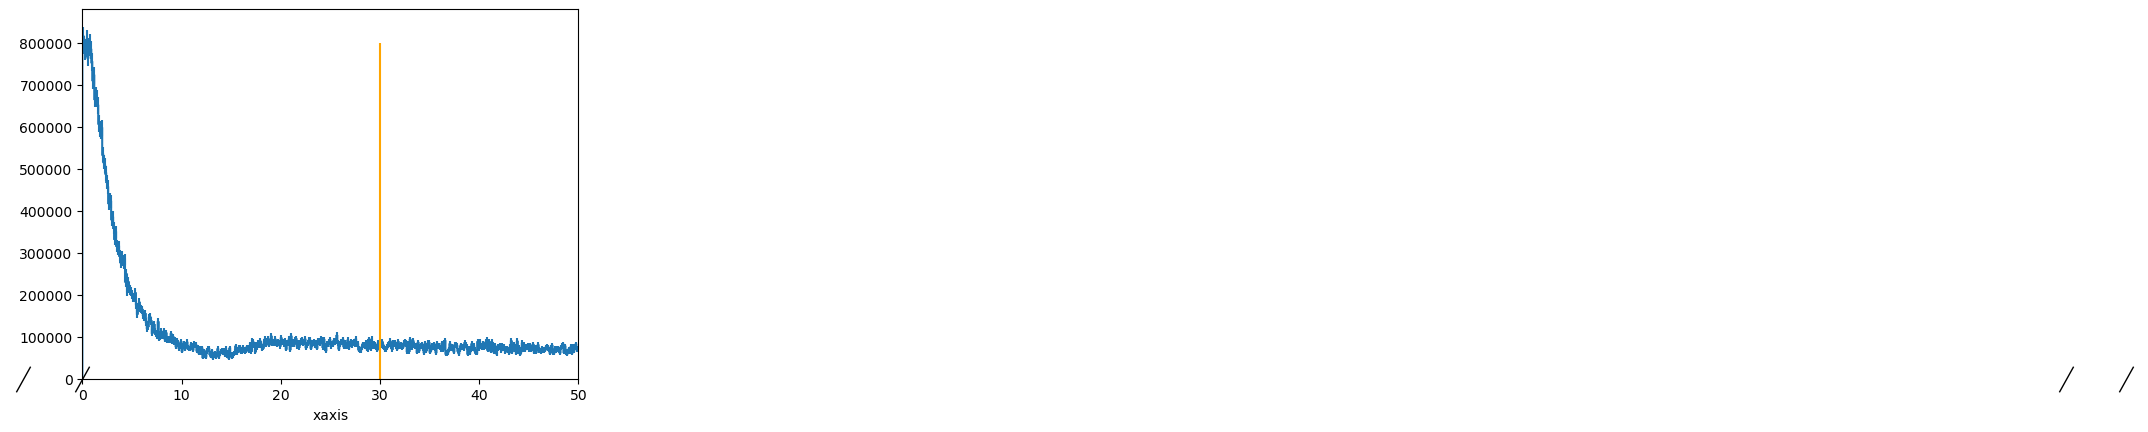

In [49]:
hep.histplot(df['p8_ee_WW_ecm240/missingEnergy'].to_hist())
plt.xlim(0, 50)
plt.vlines(30, 0, 800000, color='orange')
plt.show()

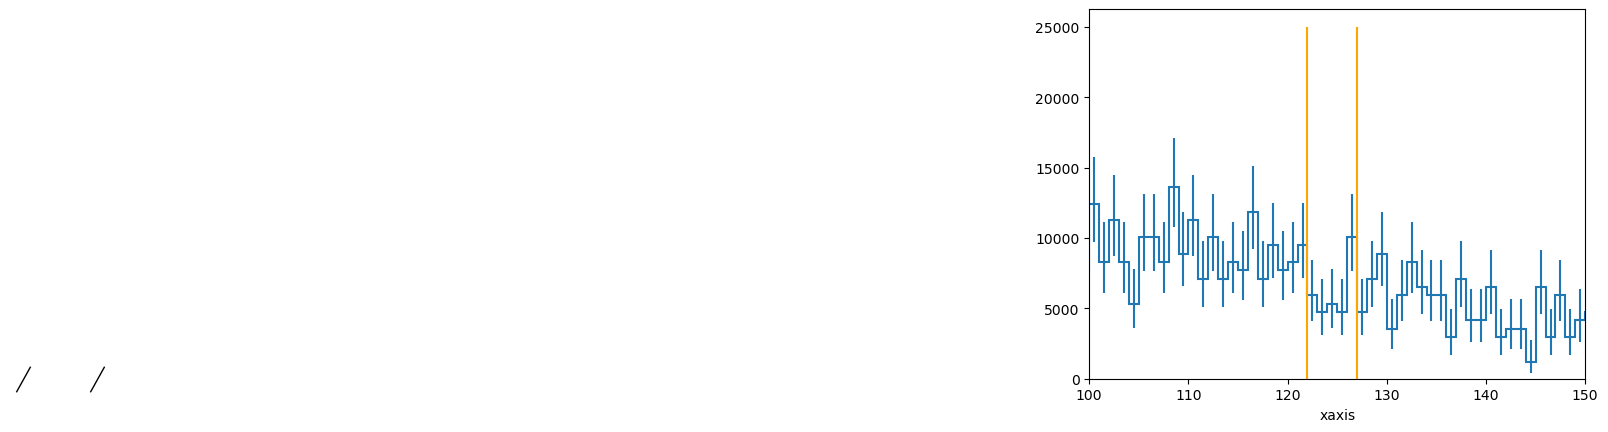

In [50]:
hep.histplot(df['p8_ee_WW_ecm240/mumu_recoil_m_nOne'].to_hist())
plt.xlim(100, 150)
plt.vlines([122, 127], [0, 0], [25000, 25000], colors=['orange', 'orange'])
plt.show()

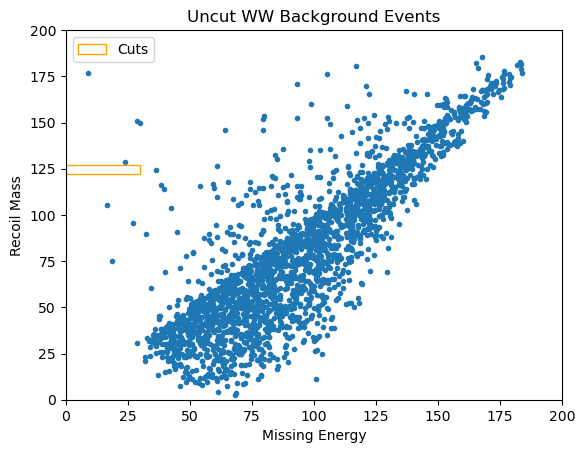

In [55]:
me = df['p8_ee_WW_ecm240/missingEnergy_vs_zmumu_recoil_m'].values()[0]
re = df['p8_ee_WW_ecm240/zmumu_recoil_m_vs_missingEnergy'].values()[0]

plt.scatter(me, re, marker='.')

plt.title("Uncut WW Background Events")
plt.xlabel("Missing Energy")
plt.ylabel("Recoil Mass")

plt.gca().add_patch(Rectangle((0, 122), 30, 5, edgecolor='orange', fill=False, label='Cuts'))

plt.xlim(0, 200)
plt.ylim(0, 200)

plt.legend()
plt.show()